Afshin Karimi <br>
Student No: 99210431 <br>
Solutions of HW5

### Problem 1: Template Matching

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

img_planes = cv2.imread("planes.png")
img_planes = cv2.cvtColor(img_planes,cv2.COLOR_BGR2RGB)
imggray_planes = cv2.cvtColor(img_planes,cv2.COLOR_BGR2GRAY)


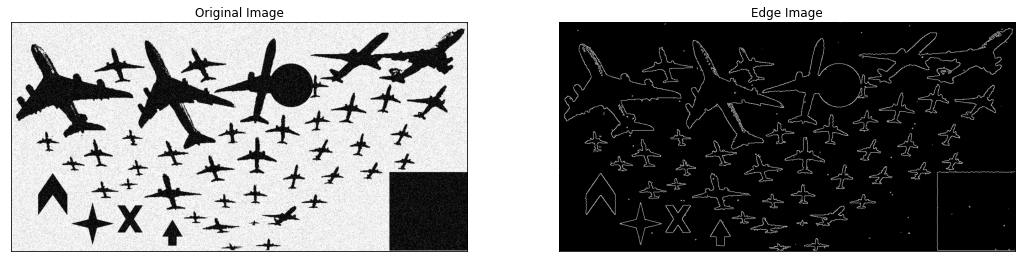

In [ ]:
# Part a : Edge Detection

edges = cv2.Canny(img_planes,250,500)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.subplot(121),plt.imshow(img_planes,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

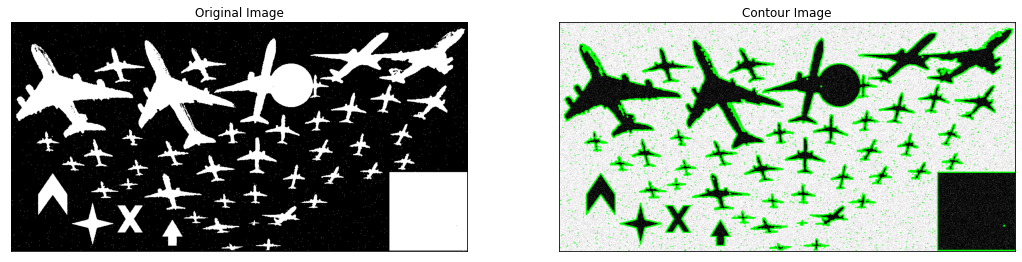

In [ ]:
# Part a : Contours detection

# create a binary thresholded image
_, binary = cv2.threshold(imggray_planes, 150, 300, cv2.THRESH_BINARY_INV)

# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw all contours
image = cv2.drawContours(img_planes, contours, -1, (0, 255, 0), 2)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.subplot(121),plt.imshow(binary,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(image,cmap = 'gray')
plt.title('Contour Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# Part b : Compute the distance transform

def distance_transform(img):
   w, h = img.shape
   dt = np.zeros((w,h), np.uint32)
   # Forward pass
   x = 0
   y = 0
   if img[x,y] == 0:
      dt[x,y] = 65535 # some large value
   for x in range(1, w):
      if img[x,y] == 0:
         dt[x,y] = 3 + dt[x-1,y]
   for y in range(1, h):
      x = 0
      if img[x,y] == 0:
         dt[x,y] = min(3 + dt[x,y-1], 4 + dt[x+1,y-1])
      for x in range(1, w-1):
         if img[x,y] == 0:
            dt[x,y] = min(4 + dt[x-1,y-1], 3 + dt[x,y-1], 4 + dt[x+1,y-1], 3 + dt[x-1,y])
      x = w-1
      if img[x,y] == 0:
         dt[x,y] = min(4 + dt[x-1,y-1], 3 + dt[x,y-1], 3 + dt[x-1,y])
   # Backward pass
   for x in range(w-2, -1, -1):
      y = h-1
      if img[x,y] == 0:
         dt[x,y] = min(dt[x,y], 3 + dt[x+1,y])
   for y in range(h-2, -1, -1):
      x = w-1
      if img[x,y] == 0:
         dt[x,y] = min(dt[x,y], 3 + dt[x,y+1], 4 + dt[x-1,y+1])
      for x in range(1, w-1):
         if img[x,y] == 0:
            dt[x,y] = min(dt[x,y], 4 + dt[x+1,y+1], 3 + dt[x,y+1], 4 + dt[x-1,y+1], 3 + dt[x+1,y])
      x = 0
      if img[x,y] == 0:
         dt[x,y] = min(dt[x,y], 4 + dt[x+1,y+1], 3 + dt[x,y+1], 3 + dt[x+1,y])
   return dt

result = distance_transform(binary)
print("Part b : Compute the distance transform: \n")
print(f"\n {result}")

Part b : Compute the distance transform: 


 [[62 63 62 ... 59 60 59]
 [59 60 59 ... 56 57 56]
 [56 55 56 ... 55 54 53]
 ...
 [20 19 18 ...  0  0  0]
 [23 22 21 ...  0  0  0]
 [26 25 24 ...  3  3  3]]


Chamfer Distance Formula:

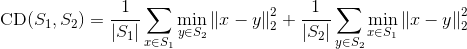

In [ ]:
# Part c 
from scipy import ndimage

templates = []
chamfer_distance=[]
for i in range(18):
  template=cv2.imread(f"template{i+1}.png",0)
  templates.append(template)
  chamfer_distance.append(ndimage.convolve(imggray_planes.copy(), template, mode='constant', cval=0.0))
print(f"chamfer_distance : \n {chamfer_distance}")

chamfer_distance : 
 [array([[ 46, 147, 224, ...,  74,  18, 254],
       [228,   9, 246, ...,  43, 255,  13],
       [217, 170,  47, ...,  55, 164, 245],
       ...,
       [146, 184, 115, ..., 212,   3, 242],
       [178, 143,  56, ...,  89,   5,  64],
       [146,  20,   9, ...,   4, 136, 168]], dtype=uint8), array([[200, 167, 113, ..., 230,  62,  28],
       [ 89,  84,  54, ...,  89,  95,  56],
       [ 97, 237, 141, ...,  10,  86,  93],
       ...,
       [198, 153, 157, ...,   0, 224,  45],
       [239, 128, 127, ...,  21, 236, 204],
       [207, 249, 162, ..., 237,  42, 203]], dtype=uint8), array([[193,  15,  66, ...,  80, 122, 224],
       [225,  62,  88, ..., 226, 245,  66],
       [162, 133, 211, ..., 217,  22, 141],
       ...,
       [126,  62,  35, ..., 207, 170, 185],
       [ 50,  66, 100, ..., 226, 214,  60],
       [ 93,  12, 193, ...,  76, 208, 255]], dtype=uint8), array([[  2, 214, 161, ..., 142,  94,  66],
       [ 71, 102, 208, ..., 248, 168, 167],
       [177, 209,

part d & e : 



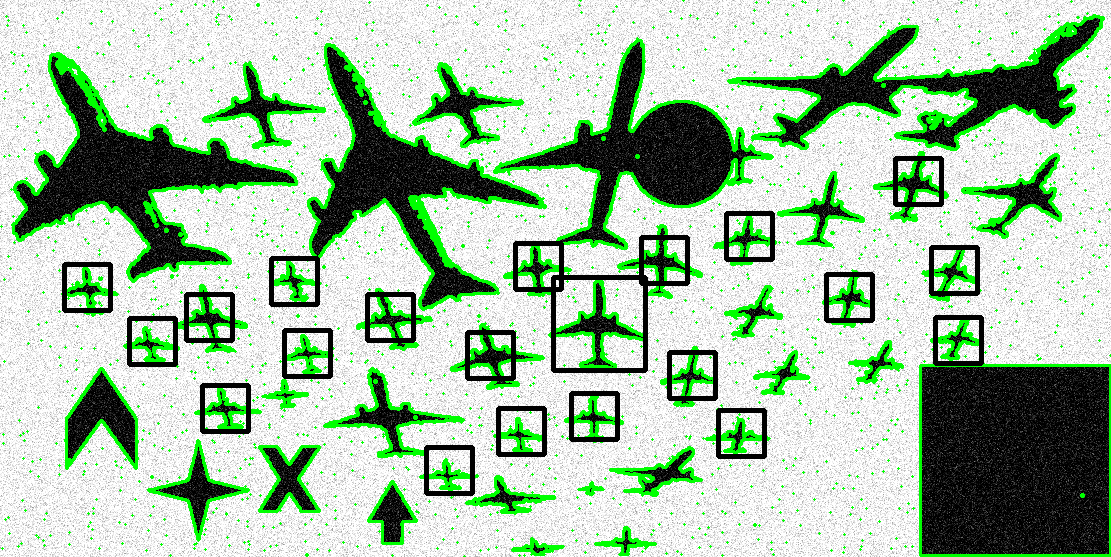


 part f : 


 it takes 0.9792699999999996 seconds to process all the images. 

 It is also possible that each piece has a unique pixel for some specific x,y coordinate 
 that would make it different from all other 17 pieces. I call that 'pixel signature'.
 If you can find this signature, you can use pixel matching instead of template matching.


In [ ]:
# Part d & e & f
import time
tic = time.clock()


templates = []
THRESHOLD = 0.28
for i in range(18):
  template=cv2.imread(f"template{i+1}.png",0)
  templates.append(template)
  
detections = []
for template in templates:
    w, h = template.shape[::-1]
    template_matching = cv2.matchTemplate(binary, template, cv2.TM_CCOEFF_NORMED
    )

    match_locations = np.where(template_matching >= THRESHOLD)
    # match_locations = np.where(template_matching >= template.matching_threshold)
    # print(np.max(template_matching))
    for (x, y) in zip(match_locations[1], match_locations[0]):
        match = {
            "TOP_LEFT_X": x,
            "TOP_LEFT_Y": y,
            "BOTTOM_RIGHT_X": x + w,
            "BOTTOM_RIGHT_Y": y + h,
            "MATCH_VALUE": template_matching[y, x],
            "LABEL": 'template.label',
            "COLOR": (0,0,0)
        }
        
        detections.append(match)

# define non max suppression function
def non_max_suppression(
    objects,
    non_max_suppression_threshold=0.1,
    score_key="MATCH_VALUE",
):
    """
    Filter objects overlapping with IoU over threshold by keeping only the one with maximum score.
    Args:
        objects (List[dict]): a list of objects dictionaries, with:
            {score_key} (float): the object score
            {top_left_x} (float): the top-left x-axis coordinate of the object bounding box
            {top_left_y} (float): the top-left y-axis coordinate of the object bounding box
            {bottom_right_x} (float): the bottom-right x-axis coordinate of the object bounding box
            {bottom_right_y} (float): the bottom-right y-axis coordinate of the object bounding box
        non_max_suppression_threshold (float): the minimum IoU value used to filter overlapping boxes when
            conducting non max suppression.
        score_key (str): score key in objects dicts
    Returns:
        List[dict]: the filtered list of dictionaries.
    """
    sorted_objects = sorted(objects, key=lambda obj: obj[score_key], reverse=True)
    filtered_objects = []
    for object_ in sorted_objects:
        overlap_found = False
        for filtered_object in filtered_objects:
            iou = compute_iou(object_, filtered_object)
            if iou > non_max_suppression_threshold:
                overlap_found = True
                break
        if not overlap_found:
            filtered_objects.append(object_)
    return filtered_objects

# compute iou
def compute_iou(a, b, epsilon=1e-5):
    a=[a['TOP_LEFT_X'],a['TOP_LEFT_Y'],a['BOTTOM_RIGHT_X'],a['BOTTOM_RIGHT_Y']]
    b=[b['TOP_LEFT_X'],b['TOP_LEFT_Y'],b['BOTTOM_RIGHT_X'],b['BOTTOM_RIGHT_Y']]
    """ Given two boxes `a` and `b` defined as a list of four numbers:
            [x1,y1,x2,y2]
        where:
            x1,y1 represent the upper left corner
            x2,y2 represent the lower right corner
        It returns the Intersect of Union score for these two boxes.

    Args:
        a:          (list of 4 numbers) [x1,y1,x2,y2]
        b:          (list of 4 numbers) [x1,y1,x2,y2]
        epsilon:    (float) Small value to prevent division by zero

    Returns:
        (float) The Intersect of Union score.
    """
    # COORDINATES OF THE INTERSECTION BOX
    x1 = max(a[0], b[0])
    y1 = max(a[1], b[1])
    x2 = min(a[2], b[2])
    y2 = min(a[3], b[3])

    # AREA OF OVERLAP - Area where the boxes intersect
    width = (x2 - x1)
    height = (y2 - y1)
    # handle case where there is NO overlap
    if (width<0) or (height <0):
        return 0.0
    area_overlap = width * height

    # COMBINED AREA
    area_a = (a[2] - a[0]) * (a[3] - a[1])
    area_b = (b[2] - b[0]) * (b[3] - b[1])
    area_combined = area_a + area_b - area_overlap

    # RATIO OF AREA OF OVERLAP OVER COMBINED AREA
    iou = area_overlap / (area_combined+epsilon)
    return iou

NMS_THRESHOLD = 0.2
res = non_max_suppression(detections, non_max_suppression_threshold=NMS_THRESHOLD)
img=img_planes.copy()

for r in res:
  cv2.rectangle(img,(r['TOP_LEFT_X'],r['TOP_LEFT_Y']), (r['BOTTOM_RIGHT_X'],r['BOTTOM_RIGHT_Y']), r['COLOR'] , 3)
print(f"part d & e : \n")
cv2_imshow(img)

toc = time.clock()
print(f"\n part f : \n")
print(f"\n it takes {toc - tic} seconds to process all the images. \n")
print(" It is also possible that each piece has a unique pixel for some specific"
" x,y coordinate \n that would make it different from all other 17 pieces. I call that 'pixel signature'.\n"
" If you can find this signature, you can use pixel matching instead of template matching.")

### Problem 2: ICP Algorithm

In [ ]:
# Part a

import numpy as np
from sklearn.neighbors import NearestNeighbors


def best_fit_transform(A, B):
    '''
    Calculates the least-squares best-fit transform that maps corresponding points A to B in m spatial dimensions
    '''

    assert A.shape == B.shape

    # get number of dimensions
    m = A.shape[1]

    # translate points to their centroids
    centroid_A = np.mean(A, axis=0)
    centroid_B = np.mean(B, axis=0)
    AA = A - centroid_A
    BB = B - centroid_B

    # rotation matrix
    H = np.dot(AA.T, BB)
    U, S, Vt = np.linalg.svd(H)
    R = np.dot(Vt.T, U.T)

    # special reflection case
    if np.linalg.det(R) < 0:
       Vt[m-1,:] *= -1
       R = np.dot(Vt.T, U.T)

    # translation
    t = centroid_B.T - np.dot(R,centroid_A.T)

    # homogeneous transformation
    T = np.identity(m+1)
    T[:m, :m] = R
    T[:m, m] = t

    return T, R, t


def nearest_neighbor(src, dst):
    '''
    Find the nearest (Euclidean) neighbor in dst for each point in src
    '''

    assert src.shape == dst.shape

    neigh = NearestNeighbors(n_neighbors=1)
    neigh.fit(dst)
    distances, indices = neigh.kneighbors(src, return_distance=True)
    return distances.ravel(), indices.ravel()


def icp(A, B, init_pose=None, max_iterations=20, tolerance=0.001):
    '''
    The Iterative Closest Point method: finds best-fit transform that maps points A on to points B
    '''

    assert A.shape == B.shape

    # get number of dimensions
    m = A.shape[1]

    # make points homogeneous, copy them to maintain the originals
    src = np.ones((m+1,A.shape[0]))
    dst = np.ones((m+1,B.shape[0]))
    src[:m,:] = np.copy(A.T)
    dst[:m,:] = np.copy(B.T)

    # apply the initial pose estimation
    if init_pose is not None:
        src = np.dot(init_pose, src)

    prev_error = 0

    for i in range(max_iterations):
        # find the nearest neighbors between the current source and destination points
        distances, indices = nearest_neighbor(src[:m,:].T, dst[:m,:].T)

        # compute the transformation between the current source and nearest destination points
        T,R,_ = best_fit_transform(src[:m,:].T, dst[:m,indices].T)

        # update the current source
        src = np.dot(T, src)

        # check error
        mean_error = np.mean(distances)
        if np.abs(prev_error - mean_error) < tolerance:
            break
        prev_error = mean_error

    # calculate final transformation
    T,R,_ = best_fit_transform(A, src[:m,:].T)

    return T, distances, i , R

pc1 = np.load("pc1.npy")
pc2 = np.load("pc2.npy")

T , distances, i , R1 = icp(pc1,pc2)
print("Part a Solution \n")
print(f"Rotaton Matrix : \n {R1} \n")
print(f"Final homogeneous transformation that maps A on to B : \n {T} \n")
print(f"Euclidean distances (errors) of the nearest neighbor : \n {distances} \n")
print(f"Number of iterations to converge : \n {i}")

Part a Solution 

Rotaton Matrix : 
 [[ 0.92836582  0.34090016 -0.14806749]
 [-0.37163755  0.85652097 -0.35813036]
 [ 0.00473622  0.38750343  0.9218561 ]] 

Final homogeneous transformation that maps A on to B : 
 [[ 0.92836582  0.34090016 -0.14806749 -2.84062165]
 [-0.37163755  0.85652097 -0.35813036 -1.49482376]
 [ 0.00473622  0.38750343  0.9218561  -1.19157035]
 [ 0.          0.          0.          1.        ]] 

Euclidean distances (errors) of the nearest neighbor : 
 [0.19938597 0.52979038 0.93468112 ... 0.22910188 0.1196696  0.07490428] 

Number of iterations to converge : 
 10


In [ ]:
# Part b

# translate points to their centroids
centroid_A = np.mean(pc1, axis=0)
centroid_B = np.mean(pc2, axis=0)
AA = pc1 - centroid_A
BB = pc2 - centroid_B

# rotation matrix
H = np.dot(AA.T, BB)
U, S, Vt = np.linalg.svd(H)
R2 = np.dot(Vt.T, U.T)

m = pc1.shape[1]
# special reflection case
if np.linalg.det(R2) < 0:
    Vt[m-1,:] *= -1
    R2 = np.dot(Vt.T, U.T)

# translation
t2 = centroid_B.T - np.dot(R2,centroid_A.T)

# homogeneous transformation
T2 = np.identity(m+1)
T2[:m, :m] = R2
T2[:m, m] = t2

print("part b solution : \n")
print(f'Rotaton Matrix that aligns two sets of PCA axes : \n {R2}')
print(f'Final homogeneous transformation that maps A on to B : : \n {T2}')

part b solution : 

Rotaton Matrix that aligns two sets of PCA axes : 
 [[-0.5820724  -0.8107543   0.06220377]
 [ 0.37610617 -0.2006177   0.9045975 ]
 [-0.7209272   0.5499365   0.4217037 ]]
Final homogeneous transformation that maps A on to B : : 
 [[-0.58207238 -0.8107543   0.06220377  3.53955865]
 [ 0.37610617 -0.2006177   0.90459752 -0.2022891 ]
 [-0.72092718  0.54993647  0.4217037  -0.12166542]
 [ 0.          0.          0.          1.        ]]


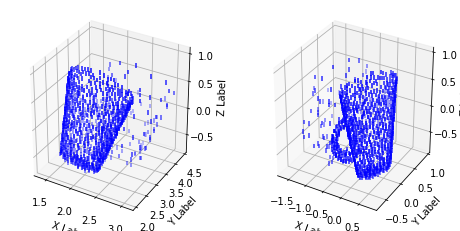

In [ ]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

X0 = np.ones((1024,1))
pc1new = np.hstack((pc1,X0))
pc2new = np.hstack((pc2,X0))
pc1_new = T @ pc1new.T
pc2_new = T2 @ pc2new.T

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')

xs = pc1.T[0]
ys = pc1.T[1]
zs = pc1.T[2]
ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax = fig.add_subplot(1, 2, 2, projection='3d')
xs = pc1_new[0]
ys = pc1_new[1]
zs = pc1_new[2]
ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

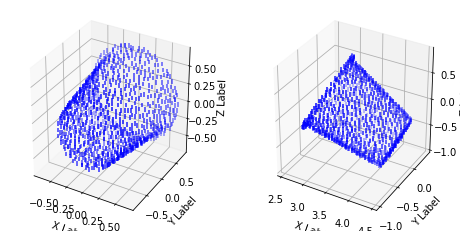

In [ ]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')

xs = pc2.T[0]
ys = pc2.T[1]
zs = pc2.T[2]
ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax = fig.add_subplot(1, 2, 2, projection='3d')
xs = pc2_new[0]
ys = pc2_new[1]
zs = pc2_new[2]
ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()